In [131]:
%matplotlib widget
%reload_ext autoreload
%autoreload 2
import numpy as np
from pyrfu.plot import plot_line, plot_spectr
from pyrfu import mms
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.stats import linregress
import xarray as xr

plt.style.use('../msc-project/figstyle.mplstyle')
from matplotlib.font_manager import fontManager
fontManager.addfont('../msc-project/fonts/TIMES.TTF')


In [132]:
# Select data file to load from
# SW + iFS
data_out = np.genfromtxt('output_data_new_2/stats/density_correction_stats_full_BVR_0523.csv', dtype=None,names=True, skip_header=0, delimiter=',')

# Only SW
data_out_sw = np.genfromtxt('output_data_new_2/stats/only_sw_tints_BVR_0527.csv', dtype=None,names=True, skip_header=0, delimiter=',')



In [133]:
data_dict = {name: data_out[name] for name in data_out.dtype.names}
data_dict_sw = {name: data_out_sw[name] for name in data_out_sw.dtype.names}


# SW + iFS
start_full, end_full, ce_full, ci_full, ne_fit_full, ne_fpi_full, ni_fpi_full,\
    vex_fpi_full, vey_fpi_full, vez_fpi_full, vix_fpi_full, viy_fpi_full, viz_fpi_full,\
        t_e_full, t_i_full, bx_full, by_full, bz_full, rx_full, ry_full, rz_full, \
            vsc_full, N0_full, beta_full, ic_full, sw_mode_full = data_dict.values()

start_dts_ = np.array(start_full, dtype='datetime64')
stop_dts_ = np.array(end_full, dtype='datetime64')
idxs_per_sc = [(ic_full == i) for i in range(1,5)]            
         
# SW only   
start_full_sw, end_full_sw, ce_full_sw, ci_full_sw, ne_fit_full_sw, ne_fpi_full_sw, ni_fpi_full_sw, \
    vex_fpi_full_sw, vey_fpi_full_sw, vez_fpi_full_sw, vix_fpi_full_sw, viy_fpi_full_sw, viz_fpi_full_sw, \
        t_e_full_sw, t_i_full_sw, bx_full_sw, by_full_sw, bz_full_sw, rx_full_sw, ry_full_sw, rz_full_sw, \
        vsc_full_sw, N0_full_sw, beta_full_sw, ic_full_sw, sw_mode_full_sw = data_dict_sw.values()


start_dts_sw_ = np.array(start_full_sw, dtype='datetime64')
stop_dts_sw_ = np.array(end_full_sw, dtype='datetime64')
idxs_per_sc_sw = [(ic_full_sw == i) for i in range(1,5)]

In [134]:
def sel_data(ic):
    """Select data for a specific spacecraft."""
    idx = idxs_per_sc[ic - 1]
    return [start_dts_[idx], stop_dts_[idx], ce_full[idx], ci_full[idx],
            ne_fit_full[idx], ne_fpi_full[idx], ni_fpi_full[idx],
            vex_fpi_full[idx], vey_fpi_full[idx], vez_fpi_full[idx],
            vix_fpi_full[idx], viy_fpi_full[idx], viz_fpi_full[idx],
            t_e_full[idx], t_i_full[idx], bx_full[idx], by_full[idx],
            bz_full[idx], rx_full[idx], ry_full[idx], rz_full[idx],
            vsc_full[idx], N0_full[idx], beta_full[idx], ic_full[idx], sw_mode_full[idx]]
    
    
def sel_data_sw(ic):
    """Select data for a specific spacecraft."""
    idx = idxs_per_sc_sw[ic - 1]
    return [
        start_dts_sw_[idx], stop_dts_sw_[idx], ce_full_sw[idx], ci_full_sw[idx],
        ne_fit_full_sw[idx], ne_fpi_full_sw[idx], ni_fpi_full_sw[idx],
        vex_fpi_full_sw[idx], vey_fpi_full_sw[idx], vez_fpi_full_sw[idx],
        vix_fpi_full_sw[idx], viy_fpi_full_sw[idx], viz_fpi_full_sw[idx],
        t_e_full_sw[idx], t_i_full_sw[idx], bx_full_sw[idx], by_full_sw[idx],
        bz_full_sw[idx], rx_full_sw[idx], ry_full_sw[idx], rz_full_sw[idx],
        vsc_full_sw[idx], N0_full_sw[idx], beta_full_sw[idx], ic_full_sw[idx], sw_mode_full_sw[idx]
    ]



    
# start,end,ce,ci,ne_fit,ne_fpi,ni_fpi,vex_fpi,vey_fpi,vez_fpi,vix_fpi,viy_fpi,viz_fpi,t_e,t_i,bx,by,bz,rx,ry,rz,vsc,N0,beta,ic,sw_mode = sel_data(1)


In [135]:
start,end,ce,ci,ne_fit,ne_fpi,ni_fpi,vex_fpi,vey_fpi,vez_fpi,vix_fpi,viy_fpi,viz_fpi,t_e,t_i,bx,by,bz,rx,ry,rz,vsc,N0,beta,ic,sw_mode = sel_data(1)

In [136]:
# SW mode
ON_idxs = np.where(sw_mode == 1)[0]
OFF_idxs = np.where(sw_mode == 0)[0]

# Spatial distribution of data

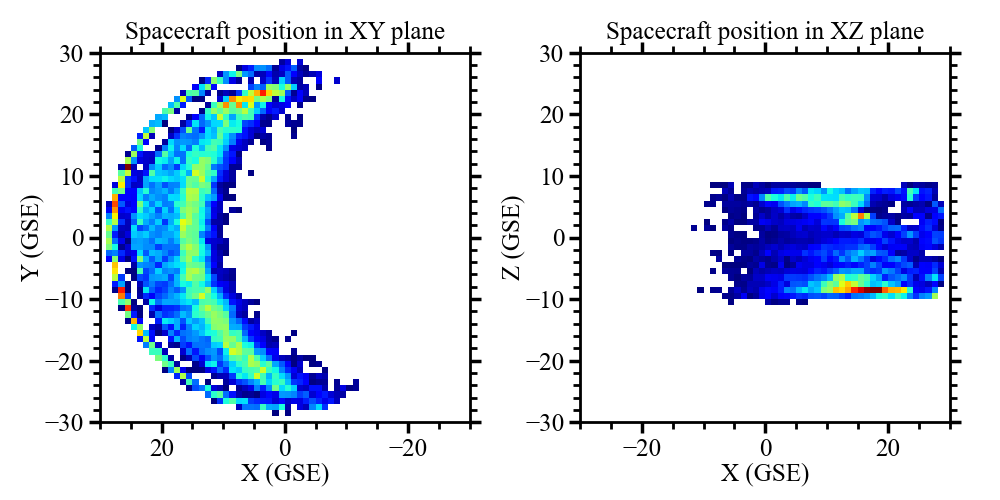

In [137]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
plt.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1, wspace=0.3)
ax1 = axs[0]
ax2 = axs[1]

# Valid indices for rx, ry, rz
valid_idxs = ((abs(rx) < 1e10) & (abs(ry) < 1e10) & (abs(rz) < 1e10))

# Select valid data points and convert to earth radii
Rx = rx[valid_idxs] / 6371.2 
Ry = ry[valid_idxs] / 6371.2
Rz = rz[valid_idxs] / 6371.2

Rlim = 30
bins = np.arange(-Rlim, Rlim + 1, 1)


# Plot the spatial position of the spacecraft in the XY and XZ GSE planes
# ax1.scatter(Rx, Ry, c='k', s=1)
ax1.hist2d(Rx, Ry, bins=[bins, bins], cmap='jet', cmin=1)
ax1.set_xlabel('X (GSE)')
ax1.set_ylabel('Y (GSE)')
ax1.set_title('Spacecraft position in XY plane')
ax1.set_box_aspect(1)
ax1.set_xlim(-Rlim, Rlim)
ax1.set_ylim(-Rlim, Rlim)
# invert x axis
ax1.invert_xaxis()

# ax2.scatter(Rx, Rz, c='k', s=1)
ax2.hist2d(Rx, Rz, bins=[bins, bins], cmap='jet', cmin=1)
ax2.set_xlabel('X (GSE)')
ax2.set_ylabel('Z (GSE)')
ax2.set_title('Spacecraft position in XZ plane')
ax2.set_box_aspect(1)
ax2.set_xlim(-Rlim, Rlim)
ax2.set_ylim(-Rlim, Rlim)


fig.savefig('figures/thesis/full_pos.png', dpi=300)


# Linear regression fit to $n_\mathrm{e}^\mathrm{fit}$ and $n_\mathrm{e}^\mathrm{FPI}$

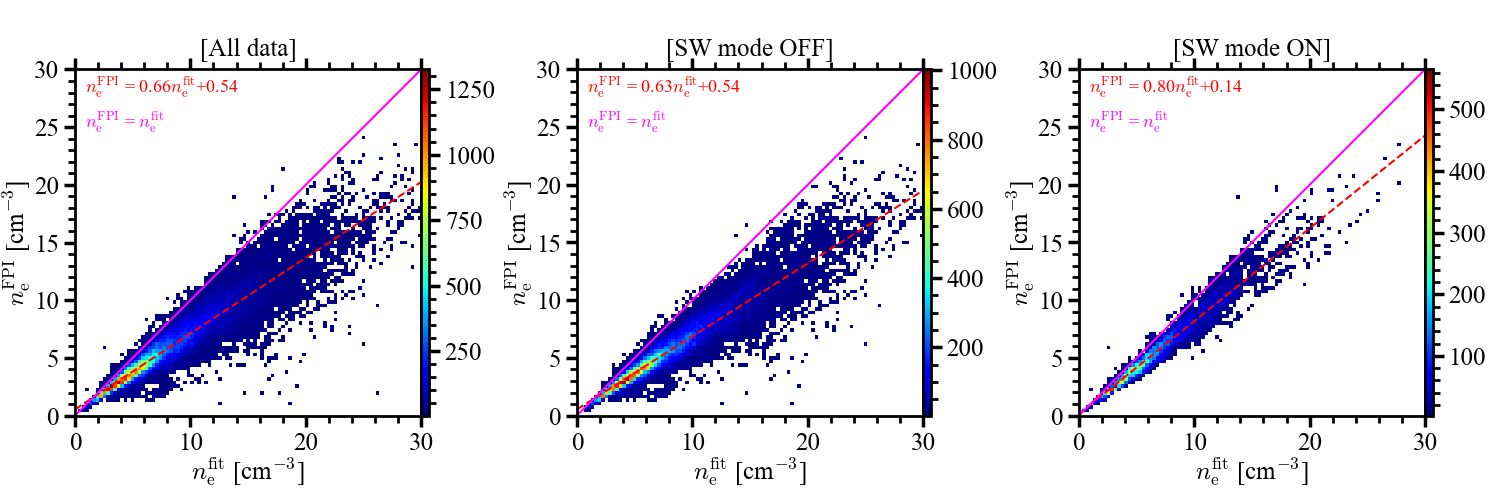

In [138]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
plt.subplots_adjust(wspace=0.45, top=0.98, bottom=0.05, left=0.05, right=0.95, hspace=0)

# Plot settings
nbins = 100
nmax = 30
xbins = np.linspace(0, nmax, nbins)
ybins = np.linspace(0, nmax, nbins)
cmin = 3

nfit_str = r'$n_\mathrm{e}^\mathrm{fit}$'
nfpi_str = r'$n_\mathrm{e}^\mathrm{FPI}$'


for i, plot_idx in enumerate([..., OFF_idxs, ON_idxs]):
    ax = axs[i]
    xdata = ne_fit[plot_idx]
    ydata = ne_fpi[plot_idx]
    valid_idx = np.isfinite(xdata) & np.isfinite(ydata) & (xdata < nmax) & (ydata < nmax)
    xdata = xdata[valid_idx]
    ydata = ydata[valid_idx]

    ax.hist2d(xdata, ydata, bins=[xbins, ybins], cmap='jet', cmin=cmin)
    
    
    # Linear regression
    res = linregress(xdata, ydata)
    b, a = res.slope, res.intercept
    # Remove y ticks on the right side
    ax.yaxis.tick_left()

    # Set square aspect
    ax.set_box_aspect(1)

    # Colorbar
    pos = ax.get_position()

    # Define new axes for the colorbar, aligned in height with ax_top
    cbar_ax = fig.add_axes([pos.x1, pos.y0, 0.005, pos.height])  # [left, bottom, width, height]

    # Create the colorbar in that location
    fig.colorbar(ax.collections[0], cax=cbar_ax, orientation='vertical', label='')

    # Plot the regression line and y=x line
    x_fit = np.linspace(0, nmax, 100)
    y_fit = a + b * x_fit
    ax.plot(x_fit, y_fit, color='red', linestyle='--', linewidth=1.5)
    ax.plot(x_fit, x_fit, color='magenta', linewidth=1.5)
    
    # Text annotations
    ax.text(0.03, 0.98, f'{nfpi_str} = {b:.2f}{nfit_str}{'+' if a>=0 else '-'}{a:.2f}', 
            transform=ax.transAxes, fontsize=13, verticalalignment='top', horizontalalignment='left', color='red')
    ax.text(0.03, 0.88, f'{nfpi_str} = {nfit_str}', 
        transform=ax.transAxes, fontsize=13, verticalalignment='top', horizontalalignment='left', color='magenta')

    ax.set_title(f"[{['All data', 'SW mode OFF', 'SW mode ON'][i]}]")
    ax.set_xlabel(nfit_str+r' [cm$^{-3}$]')
    ax.set_ylabel(nfpi_str+r' [cm$^{-3}$]')


# for ax in axs:
#     ax.set_box_aspect(1)
    
fig.savefig('figures/thesis/linreg_density2.png', dpi=300)
    

# Distribution of $C_\mathrm{e}^\mathrm{FPI}$

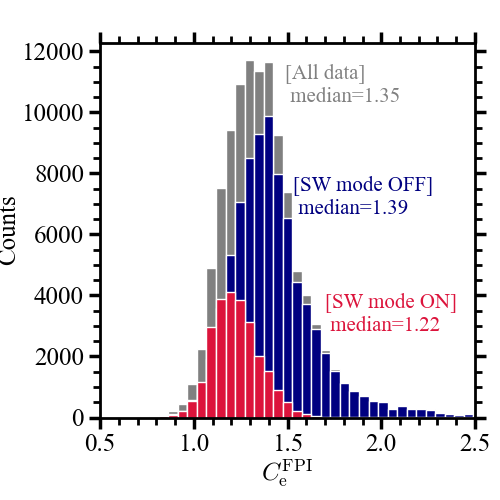

In [139]:
three_panels = False
#three_panels = True
if three_panels:
    # Create a new figure with 3 subplots
    fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
    plt.subplots_adjust(wspace=0.45, top=0.98, bottom=0.05, left=0.05, right=0.95, hspace=0)
    clrs = ['navy']*3
else:
    fig, axs = plt.subplots(ncols=1, figsize=(5, 5))
    plt.subplots_adjust(wspace=0, top=0.98, bottom=0.1, left=0.2, right=0.95, hspace=0)
    clrs = ['gray', 'navy', 'crimson']

# Plot settings
nbins = 60
cmax = 3
bins = np.linspace(0, cmax, nbins)


for i, plot_idx in enumerate([..., OFF_idxs, ON_idxs]):
    if three_panels:
        ax = axs[i]
    else:
        ax = axs
        
    xdata = ce[plot_idx]
    valid_idx = np.isfinite(xdata) & (xdata < cmax) 
    xdata = xdata[valid_idx]

    h = ax.hist(xdata, bins=bins, alpha=1, color=clrs[i], edgecolor='white')
    ax.set_ylabel('Counts')
    ax.set_xlabel(r'$C_\mathrm{e}^\mathrm{FPI}$')

    # Calculate median and plot as red and dashed axvline 
    median_value = np.median(xdata)
    if three_panels: 
        ax.axvline(median_value, color='red', linestyle='--', linewidth=1.5)
        ax.set_title(f"[{['All data', 'SW mode OFF', 'SW mode ON'][i]}]")
        ax.text(median_value*1.1 , 0.95*np.nanmax(h[0]), f'{median_value:.2f}', 
            fontsize=15, verticalalignment='top', horizontalalignment='left', color='red')
    else:
        # Text annotations
        ax.text((median_value*1.1 if i < 2 else median_value*1.4) , (0.99 if i != 1 else 0.8)*np.nanmax(h[0]), f'[{['All data', 'SW mode OFF', 'SW mode ON'][i]}]\n median={median_value:.2f}', 
            fontsize=15, verticalalignment='top', horizontalalignment='left', color=clrs[i])

    

    ax.set_box_aspect(1)

ax.set_xlim(0.5, 2.5)


if three_panels:
    fig.savefig('figures/thesis/3_Ce_dist.png', dpi=300)
else:
    fig.savefig('figures/thesis/1_Ce_dist.png', dpi=300)

    

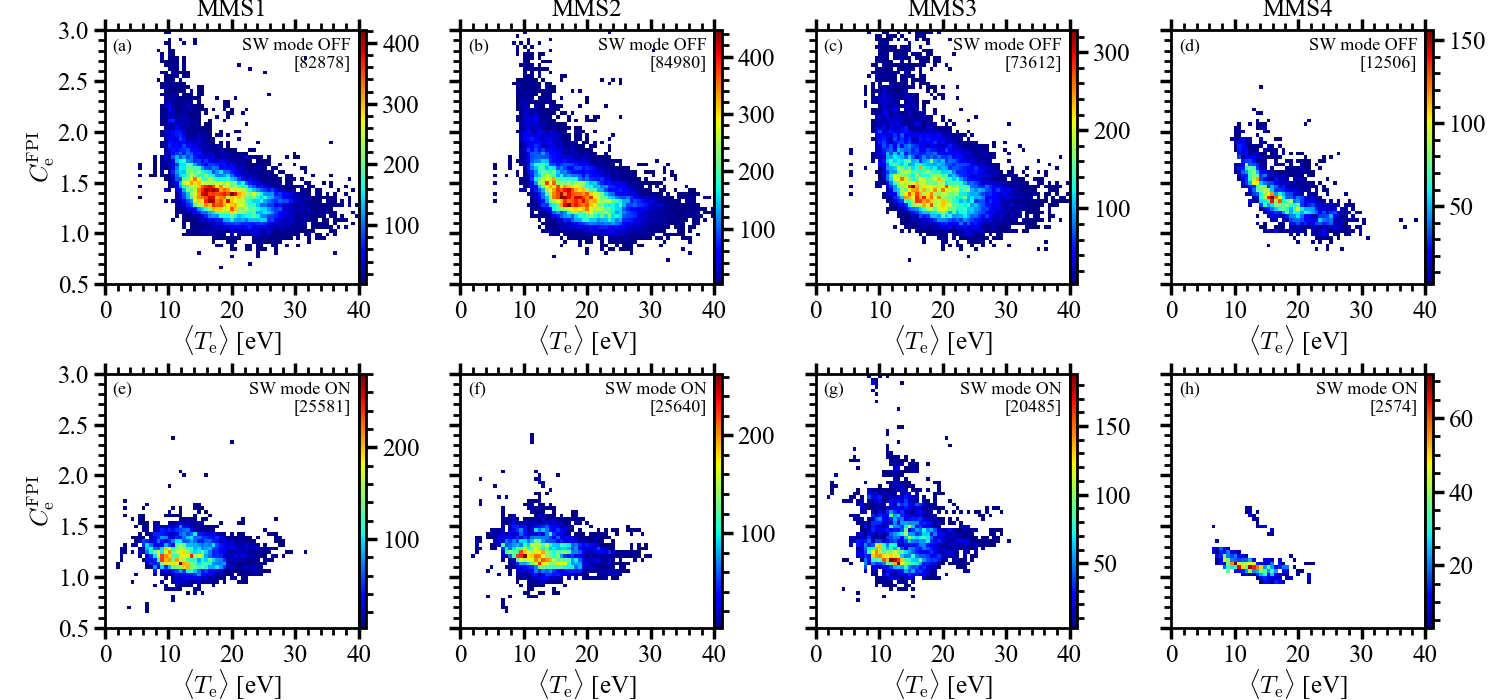

In [140]:
plt.close('all')

def make_2x4_grid():
    
    fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(15, 7))
    plt.subplots_adjust(wspace=0.4, top=0.98, bottom=0.08, left=0.07, right=0.95, hspace=0.2)
    # list of strings of letters in alphabetical order
    labels = np.reshape(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], (2, 4))


    # Plot settings
    nbins = 70
    xmin, xmax = 0, 40
    ymin, ymax = 0.5, 3
    xbins = np.linspace(xmin, xmax, nbins)
    ybins = np.linspace(ymin, ymax, nbins)

    for col in range(axs.shape[1]):
        ic_sel = idxs_per_sc[col]

        xdata = t_e_full[ic_sel]
        ydata = ce_full[ic_sel]
        valid_idx = np.isfinite(xdata) & np.isfinite(ydata) & (xdata < xmax) & (ydata < ymax)
        xdata = xdata[valid_idx]
        ydata = ydata[valid_idx]

        ON_idxs = np.where(sw_mode_full[ic_sel][valid_idx] == 1)[0]
        OFF_idxs = np.where(sw_mode_full[ic_sel][valid_idx] == 0)[0]

        for row in range(axs.shape[0]):
            ax = axs[row, col]

            if row == 0:
                ax.set_title(f"MMS{col+1}")
                plot_idx = OFF_idxs
            else:
                plot_idx = ON_idxs

            if col==0:
                ax.set_ylabel(r'$C_\mathrm{e}^\mathrm{FPI}$')
            else:
                ax.set_yticklabels([])

            h = ax.hist2d(xdata[plot_idx], ydata[plot_idx], bins=[xbins, ybins], cmap='jet', cmin=cmin)
        

            # Remove y ticks on the right side
            ax.yaxis.tick_left()

            # Remove y tick labels on the left side

            # Set square aspect
            ax.set_box_aspect(1)

            # Colorbar
            pos = ax.get_position()

            # Define new axes for the colorbar, aligned in height with ax_top
            cbar_ax = fig.add_axes([pos.x1, pos.y0, 0.005, pos.height])  # [left, bottom, width, height]

            # Create the colorbar in that location
            fig.colorbar(ax.collections[0], cax=cbar_ax, orientation='vertical', label='')

            # Text annotations
            ax.text(0.03, 0.97, f'({labels[row, col]})', 
                    transform=ax.transAxes, fontsize=13, verticalalignment='top', horizontalalignment='left', color='black')
            ax.text(0.97, 0.97, f'SW mode {"OFF" if row == 0 else "ON"}\n[{len(xdata[plot_idx])}]', 
                    transform=ax.transAxes, fontsize=13, verticalalignment='top', horizontalalignment='right', color='black')
            ax.set_xlabel(r'$\langle T_\mathrm{e} \rangle$ [eV]')
            
            
            ax.set_xlim(xmin, xmax)
            ax.set_ylim(ymin, ymax)

            ax.xaxis.set_major_locator(plt.MultipleLocator(10))
            ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
            ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
            ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))


    return fig
    # for ax in axs:
    #     ax.set_box_aspect(1)
        
fig = make_2x4_grid()
fig.savefig('figures/thesis/4x2_Ce_Te.png', dpi=300)
        

# Corrected temperatures

ON 15.64011996259157 4.816919463176399 10^4 K
OFF  21.584801026762342 5.861412351968344
corr ON 12.859884191741925 11.94717866318639
corr OFF  15.727512103022816 6.65991901029463


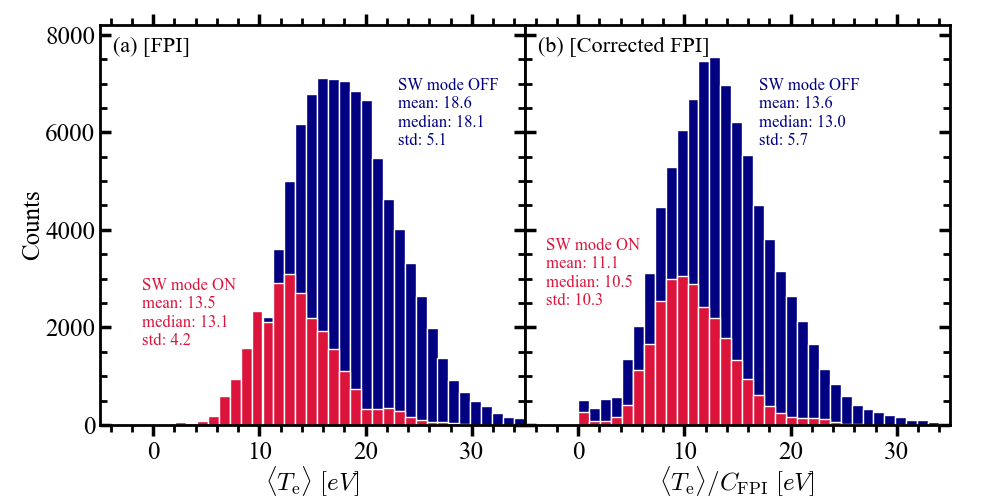

In [141]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)
plt.subplots_adjust(wspace=0, hspace=0,top=0.95, bottom=0.15, left=0.1, right=0.95)
ax1, ax2 = axs
ax1.grid(0)
ax2.grid(0)

OFF_clr = 'navy'
ON_clr = 'crimson'
nbins = 35
tbins = np.linspace(0, 35, nbins)
def plot_temperatures(ic_sel=1):
        
    ic_idxs = idxs_per_sc[ic_sel]
    sw_mode = sw_mode_full[ic_idxs]
    #start_str_, stop_str_, c0_, vsc_mean_, t_e_mean_, beta_, N0_, ic_
    ce = ce_full[ic_idxs]
    t_e_mean = t_e_full[ic_idxs]
    # sw_mode
    ON_idxs = np.where(sw_mode == 1)[0]
    OFF_idxs = np.where(sw_mode == 0)[0]


    tmoff = t_e_mean[OFF_idxs]
    tmon = t_e_mean[ON_idxs]

    tmon_mean = np.nanmean(tmon)
    tmon_median = np.nanmedian(tmon)
    tmon_std = np.nanstd(tmon)



    tmoff_median = np.nanmedian(tmoff)
    tmoff_mean = np.nanmean(tmoff)
    tmoff_std = np.nanstd(tmoff)


    _= ax1.hist(tmoff, color=OFF_clr, bins = tbins, edgecolor='white', label='non-SW mode')
    _=ax1.hist(tmon, color=ON_clr, bins = tbins, edgecolor='white', label='SW mode')

    ax1.text(0.1, 0.2, 
            f'SW mode ON\nmean: {tmon_mean:.1f}\nmedian: {tmon_median:.1f}\nstd: {tmon_std:.1f}',
            color=ON_clr, transform=ax1.transAxes,  fontsize=12)

    ax1.text(0.7, 0.7, 
            f'SW mode OFF\nmean: {tmoff_mean:.1f}\nmedian: {tmoff_median:.1f}\nstd: {tmoff_std:.1f}',
            color=OFF_clr, transform=ax1.transAxes, fontsize=12)


    ax1.set_xlabel(r'$\langle T_\mathrm{e} \rangle\ [eV]$')
    ax1.set_ylabel('Counts')
    ax1.set_ylim(0, 8200)
    # Corrected
    tmoff_corr = tmoff / ce[OFF_idxs]
    tmon_corr = tmon / ce[ON_idxs]

    tmon_corr_median = np.nanmedian(tmon_corr)
    tmon_corr_mean = np.nanmean(tmon_corr)
    tmon_corr_std = np.nanstd(tmon_corr)


    tmoff_corr_median = np.nanmedian(tmoff_corr)
    tmoff_corr_mean = np.nanmean(tmoff_corr)
    tmoff_corr_std = np.nanstd(tmoff_corr)

    _=ax2.hist(tmoff_corr, color=OFF_clr, bins = tbins,edgecolor='white', label='non-SW mode')
    _=ax2.hist(tmon_corr, color=ON_clr, bins = tbins, edgecolor='white', label='SW mode')
    
    # _=ax2.hist(tmoff_corr, color=OFF_clr, bins = tbins, label='non-SW mode')
    # _=ax2.hist(tmon_corr, color=ON_clr, bins = tbins, label='SW mode')

    ax2.text(0.05, 0.3, 
            f'SW mode ON\nmean: {tmon_corr_mean:.1f}\nmedian: {tmon_corr_median:.1f}\nstd: {tmon_corr_std:.1f}',
            color=ON_clr, transform=ax2.transAxes,  fontsize=12)

    ax2.text(0.55, 0.7, 
            f'SW mode OFF\nmean: {tmoff_corr_mean:.1f}\nmedian: {tmoff_corr_median:.1f}\nstd: {tmoff_corr_std:.1f}',
            color=OFF_clr, transform=ax2.transAxes, fontsize=12)

    # ax2.set_xlabel(r'$\frac{\langle T_\mathrm{e} \rangle}{C_\mathrm{FPI}}\ [eV]$')
    ax2.set_xlabel(r'$\langle T_\mathrm{e} \rangle / C_\mathrm{FPI}\ [eV]$')


    # (12, 0, 1, color='blue', linestyle='dashed', linewidth=1.5)

    # ax1.axvline(tmon_median, 0, 1, color=ON_clr)
    # ax1.axvline(tmoff_median, 0, 1, color=OFF_clr)

    # ax2.axvline(tmon_corr_median, 0, 1, color=ON_clr)
    # ax2.axvline(tmoff_corr_median, 0, 1, color=OFF_clr)
    
    # ax1.axvline(tmon_median, 0, 1, color='grey')
    # ax1.axvline(tmoff_median, 0, 1, color='grey')

    # ax2.axvline(tmon_corr_median, 0, 1, color='grey')
    # ax2.axvline(tmoff_corr_median, 0, 1, color='black')
    
    for i, ax in enumerate([ax1, ax2]):
        # ax.set_box_aspect(1)
        # ax.set_box_aspect(1)
        
        ax.text(0.03, 0.97, f'({['a', 'b'][i]}) [{['FPI', 'Corrected FPI'][i]}]', color='black', fontsize=16, transform=ax.transAxes, verticalalignment='top', horizontalalignment='left')
        ax.set_xlim(-5, 35)
    # Left side: outward
    ax1.tick_params(axis='y', which='both', left=True, direction='out')

    # Right side: inward
    ax1.tick_params(axis='y', which='both', right=True, direction='in')

    # Left side: outward
    ax2.tick_params(axis='y', which='both', right=True, direction='out')

    # Right side: inward
    ax2.tick_params(axis='y', which='both', left=True, direction='in')


    print('ON',tmon_mean/8.6173303e-5 / 1e4, tmon_std/8.6173303e-5 / 1e4, '10^4 K')
    print('OFF ',tmoff_mean/8.6173303e-5 / 1e4, tmoff_std/8.6173303e-5 / 1e4)

    print('corr ON',tmon_corr_mean/8.6173303e-5 / 1e4, tmon_corr_std/8.6173303e-5 / 1e4)
    print('corr OFF ',tmoff_corr_mean/8.6173303e-5 / 1e4, tmoff_corr_std/8.6173303e-5 / 1e4)
    return fig

fig = plot_temperatures(1)

fig.savefig('figures/thesis/Te_corr.png', dpi=300)


# OMNI

In [171]:
# load OMNI data, takes ~2.5 min
omni_data = xr.open_dataset('omni_vn_2017_2025.cdf')
unq_times = start_dts_sw_

# init arrays of nans
v_omni_mean = np.full(len(unq_times), np.nan)
n_omni_mean = np.full(len(unq_times), np.nan)
 
for i in range(len(unq_times)):
    # print every 1000th iteration
    if i % 10000 == 0:
        print(i, end=' ')

    start = start_dts_sw_[i]  
    end = stop_dts_sw_[i]

    ds_clip = omni_data.sel(time=slice(start, end))
    if ds_clip.time.size == 0:
        continue

    v_omni_mean[i] = ds_clip['v'].mean().data
    n_omni_mean[i] = ds_clip['n'].mean().data


0 10000 20000 30000 40000 50000 60000 70000 80000 90000 100000 110000 120000 130000 140000 150000 160000 170000 180000 190000 

In [172]:
def sel_omni_data(ic):
    idxs = idxs_per_sc_sw[ic - 1]
    return [start_dts_sw_[idxs], stop_dts_sw_[idxs], v_omni_mean[idxs], n_omni_mean[idxs]]


ic_sel_sw = 1
start_omni, end_omni, v_omni_mean_sw, n_omni_mean_sw = sel_omni_data(ic_sel_sw)
start_sw, end_sw, ce_sw, ci_sw, ne_fit_sw, ne_fpi_sw, ni_fpi_sw, vex_fpi_sw, vey_fpi_sw, vez_fpi_sw, vix_fpi_sw, viy_fpi_sw, viz_fpi_sw, t_e_sw, t_i_sw, bx_sw, by_sw, bz_sw, rx_sw, ry_sw, rz_sw, vsc_sw, N0_sw, beta_sw, ic_sw, sw_mode_sw = sel_data_sw(ic_sel_sw)

ON_idxs_sw = np.where(sw_mode_sw == 1)[0]
OFF_idxs_sw = np.where(sw_mode_sw == 0)[0]


# Stack into 2D arrays of shape (3, N)
vsw_vec = np.stack([vix_fpi_sw, viy_fpi_sw, viz_fpi_sw], axis=0)
b_vec = np.stack([bx_sw, by_sw, bz_sw], axis=0)

# Normalize the magnetic field vector to get unit vector \hat{b}
b_unit = b_vec / np.linalg.norm(b_vec, axis=0)

# Compute dot product \vec{v_sw} · \hat{b}
vcos = np.sum(vsw_vec * b_unit, axis=0)

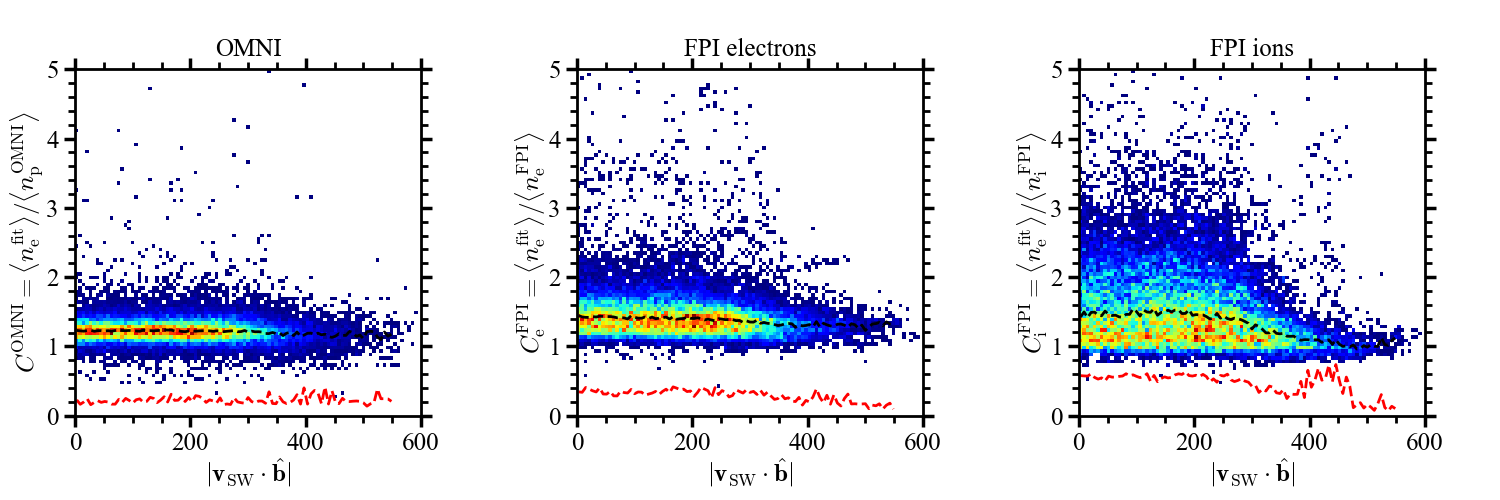

In [174]:
# OMNI plots
plt.close('all')
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
plt.subplots_adjust(wspace=0.45, top=0.98, bottom=0.05, left=0.05, right=0.95, hspace=0)

coo = ne_fit_sw / n_omni_mean_sw
ceo = ne_fit_sw / ne_fpi_sw

cio = ne_fit_sw / ni_fpi_sw

ylabels = [r'$C^\mathrm{OMNI} = \langle n_\mathrm{e}^\mathrm{fit} \rangle / \langle n_\mathrm{p}^\mathrm{OMNI} \rangle$',
           r'$C_\mathrm{e}^\mathrm{FPI} = \langle n_\mathrm{e}^\mathrm{fit} \rangle / \langle n_\mathrm{e}^\mathrm{FPI} \rangle$',
           r'$C_\mathrm{i}^\mathrm{FPI} = \langle n_\mathrm{e}^\mathrm{fit} \rangle / \langle n_\mathrm{i}^\mathrm{FPI} \rangle$']

titles = ['OMNI', 'FPI electrons', 'FPI ions']
xdata = np.abs(vcos)
xmax = 600
ymax = 5
xbins = np.linspace(0, xmax, 100)
ybins = np.linspace(0, ymax, 100)
cmin=2
for i,ydata in enumerate([coo, ceo, cio]):
    valid_idx = (np.isfinite(ydata) & np.isfinite(xdata) & (ydata < ymax) & (xdata < xmax))
    ax = axs[i]
    h = ax.hist2d(xdata[valid_idx], ydata[valid_idx], bins=[xbins, ybins], cmap='jet', cmin=cmin)

    bins = h[1]
    xcenters = 0.5 * (bins[:-1] + bins[1:])
    bin_indices = np.digitize(xdata[valid_idx], bins) - 1  # bin index for each x
    medians = np.full(len(xcenters), np.nan)
    stds = np.full(len(xcenters), np.nan)
    for j in range(len(xcenters)):
        if xcenters[j] >= 550:
            continue
        y_in_bin = ydata[valid_idx][bin_indices == j]
        if len(y_in_bin) > 0:
            medians[j] = np.median(y_in_bin)
            stds[j] = np.std(y_in_bin)
            
    ax.plot(xcenters, medians, c='black', lw=2, ls='--', label='Median')
    ax.plot(xcenters, stds, c='red', lw=2, ls='--', label='Std')


    # a = ax.hist(co, bins=ybins)
    ax.set_box_aspect(1)
    ax.set_xlabel(r'$|\mathbf{v}_\mathrm{SW} \cdot \hat{\mathbf{b}}|$')
    ax.set_ylabel(ylabels[i])
    ax.set_title(titles[i])
    ax.grid(0)


fig.savefig('figures/thesis/3plot_dopplershift.png', dpi=300)
    

0 0
0 1
1 0
1 1


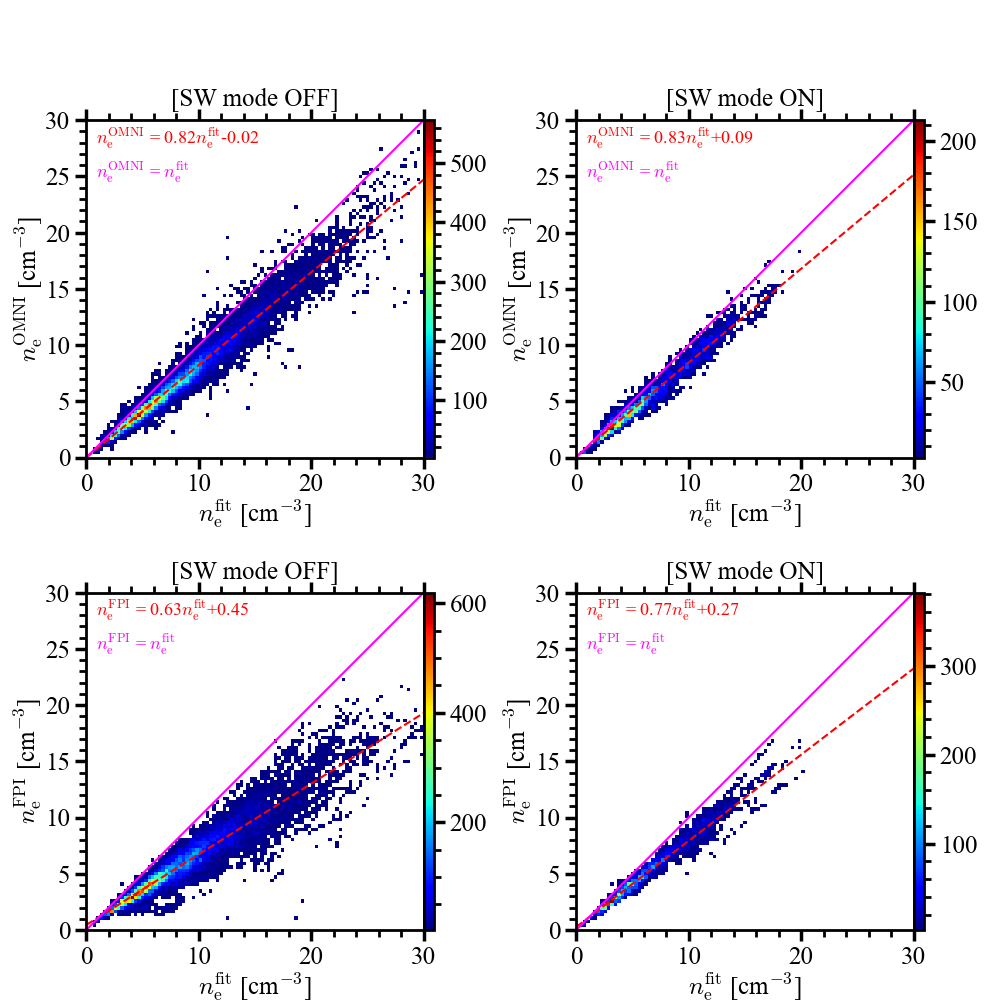

In [188]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4, bottom=0.07, left=0.08, right=0.92)

# Plot settings
nbins = 100
nmax = 30
xbins = np.linspace(0, nmax, nbins)
ybins = np.linspace(0, nmax, nbins)
cmin = 3

nfit_str = r'$n_\mathrm{e}^\mathrm{fit}$'
nomni_str = r'$n_\mathrm{e}^\mathrm{OMNI}$'
nfpi_str = r'$n_\mathrm{e}^\mathrm{FPI}$'



for row in range(2):    
    for col, plot_idx in enumerate([OFF_idxs_sw, ON_idxs_sw]):
        print(row, col)
        ax = axs[row, col]
        xdata = ne_fit_sw[plot_idx]
        if row == 0:
            ydata = n_omni_mean_sw[plot_idx]
        elif row == 1:
            ydata = ne_fpi_sw[plot_idx]
        elif row == 2:
            ydata = ne_fpi_sw[plot_idx]
            xdata = n_omni_mean_sw[plot_idx]
            
        valid_idx = np.isfinite(xdata) & np.isfinite(ydata) & (xdata < nmax) & (ydata < nmax)
        xdata = xdata[valid_idx]
        ydata = ydata[valid_idx] 
        ax.hist2d(xdata, ydata, bins=[xbins, ybins], cmap='jet', cmin=cmin)
    
    
        # Linear regression
        res = linregress(xdata, ydata)
        b, a = res.slope, res.intercept
        # Remove y ticks on the right side
        ax.yaxis.tick_left()

        # Set square aspect
        ax.set_box_aspect(1)

        # Colorbar
        pos = ax.get_position()

        # Define new axes for the colorbar, aligned in height with ax_top
        cbar_ax = fig.add_axes([pos.x1, pos.y0, 0.01, pos.height])  # [left, bottom, width, height]

        # Create the colorbar in that location
        fig.colorbar(ax.collections[0], cax=cbar_ax, orientation='vertical', label='')

        # Plot the regression line and y=x line
        x_fit = np.linspace(0, nmax, 100)
        y_fit = a + b * x_fit
        ax.plot(x_fit, y_fit, color='red', linestyle='--', linewidth=1.5)
        ax.plot(x_fit, x_fit, color='magenta', linewidth=1.5)
        
        nstr = (nomni_str if row == 0 else nfpi_str)
        
        # Text annotations
        ax.text(0.03, 0.98, f'{nstr} = {b:.2f}{nfit_str}{'+' if a>=0 else '-'}{abs(a):.2f}', 
                transform=ax.transAxes, fontsize=13, verticalalignment='top', horizontalalignment='left', color='red')
        ax.text(0.03, 0.88, f'{nstr} = {nfit_str}', 
            transform=ax.transAxes, fontsize=13, verticalalignment='top', horizontalalignment='left', color='magenta')

        ax.set_ylabel(nstr+r' [cm$^{-3}$]')


        ax.set_title(f"[{['SW mode OFF', 'SW mode ON'][col]}]")
        if row < 2:
            ax.set_xlabel(nfit_str+r' [cm$^{-3}$]')
        else:
            ax.set_xlabel(nomni_str+r' [cm$^{-3}$]')
    


# for ax in axs:
#     ax.set_box_aspect(1)
    
fig.savefig('figures/thesis/omni_linreg_density.png', dpi=300)
    